In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

def create_klines_dataset(data) :
    y = np.array(data[3])
    # del data['ignore']
    x = np.array(data)

    x = np.reshape(x, (x.shape[0],  look_back, 1))
    y = np.reshape(y, (y.shape[0],  look_back, 1))

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

    return x_train, x_val, x_test, y_train, y_val, y_test

import pandas as pd

# klines_dataset = pd.read_csv('resource/dataset/binance/klines-BTCUSDT-1m_20220101090000_20220101205900.csv')
klines_dataset = pd.read_csv('resource/dataset/binance/klines-BTCUSDT-1m_20220101210000_20220102085900.csv')
del klines_dataset['openTime']
del klines_dataset['closeTime']
del klines_dataset['ignore']

y = np.array(klines_dataset['close'])
x = np.array(klines_dataset)
#

x = np.reshape(x, (int(x.shape[0]/look_back),  look_back, x.shape[1]))
y = np.reshape(y, (y.shape[0],  look_back, 1))

#
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
# x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

# scaler = MinMaxScaler(feature_range=(0, 1))
# klines_dataset.shape
# klines_dataset_scaled = scaler.fit_transform(klines_dataset)
# # klines_dataset_scaled.shape
# x_train, x_val, x_test, y_train, y_val, y_test = create_klines_dataset(klines_dataset_scaled)

In [509]:
batch_size = 32
look_back = 3

In [736]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# def create_train_dataset(x,y):
#     # x_data = x.to_numpy()
#     # y_data = y.to_numpy()
#     x_data = x
#     y_data = y
#
#     x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=1)
#     x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1)
#
#     return x_train, x_val, x_test, y_train, y_val, y_test

def create_LSTM_dataset(data) :
    data_arr = data
    x_arr = []
    y_arr = []

    for i in range(len(data_arr) - look_back):
        x_arr.append(data_arr[i:i + look_back, 0])
        y_arr.append(data_arr[i + look_back, 0])

    x_arr, y_arr = np.array(x_arr), np.array(y_arr)
    x_arr = np.reshape(x_arr, (x_arr.shape[0], x_arr.shape[1],1))

    return x_arr, y_arr

import pandas as pd


path = 'resource/dataset/binance/'

for i in range(28) :
    fileNm = path + 'klines-BTCUSDT-1m_202201'

klines = pd.read_csv('resource/dataset/binance/klines-BTCUSDT-1m_20220101090000_20220101205900.csv')
# klines = pd.read_csv('resource/dataset/binance/klines-BTCUSDT-1m_20220101210000_20220102085900.csv')

klines_dataset = pd.DataFrame(klines['close'])

# 학습데이터 분류
train, test = train_test_split(klines_dataset, test_size=0.2, random_state=1, shuffle=False)
# train, test = train_test_split(klines_dataset, test_size=0.2, random_state=1)

# 전처리 : 정규화
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(train)
train_scaled = scaler.transform(train)
test_scaled = scaler.transform(test)

# 검증데이터 분류
train, val = train_test_split(train_scaled, test_size=0.2, random_state=1, shuffle=False)
# train, val = train_test_split(train_scaled, test_size=0.2, random_state=1)

x_train, y_train = create_LSTM_dataset(train)
x_val, y_val = create_LSTM_dataset(val)
x_test, y_test = create_LSTM_dataset(test_scaled)





460

In [730]:
import tensorflow as tf

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(32, input_shape=(look_back, 1), return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2)) # overfitting을 막기 위해 20% 가량을 drop
model.add(tf.keras.layers.LSTM(32, input_shape=(look_back, 1)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1))
# model.add(tf.keras.layers.Dense(64, input_dim= 8, activation='relu'))
# model.add(tf.keras.layers.Dense(8, activation='relu'))
# model.add(tf.keras.layers.Dense(1))

In [732]:
# sgd = tf.keras.optimizers.Adam(learning_rate=0.00000001)
# model.compile(loss='mse',optimizer=sgd,metrics=['accuracy'])
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])

In [394]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_31 (LSTM)              (1, 3, 32)                5376      
                                                                 
 dropout_30 (Dropout)        (1, 3, 32)                0         
                                                                 
 lstm_32 (LSTM)              (1, 32)                   8320      
                                                                 
 dropout_31 (Dropout)        (1, 32)                   0         
                                                                 
 dense_18 (Dense)            (1, 1)                    33        
                                                                 
Total params: 13,729
Trainable params: 13,729
Non-trainable params: 0
_________________________________________________________________


In [733]:
hist = model.fit(x_train, y_train, epochs=1000, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/1000
15/15 [==============================] - 3s 44ms/step - loss: 0.2507 - accuracy: 0.0022 - val_loss: 0.1659 - val_accuracy: 0.0000e+00
Epoch 2/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.1081 - accuracy: 0.0022 - val_loss: 0.0488 - val_accuracy: 0.0000e+00
Epoch 3/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.0445 - accuracy: 0.0022 - val_loss: 0.0454 - val_accuracy: 0.0000e+00
Epoch 4/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0432 - accuracy: 0.0044 - val_loss: 0.0399 - val_accuracy: 0.0000e+00
Epoch 5/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0392 - accuracy: 0.0022 - val_loss: 0.0390 - val_accuracy: 0.0000e+00
Epoch 6/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0438 - accuracy: 0.0022 - val_loss: 0.0388 - val_accuracy: 0.0000e+00
Epoch 7/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0396 - accuracy: 0.0022 - val_loss: 0.0385 - va

In [734]:
y_predict = model.predict(x_test, 32)
real_predictions = scaler.inverse_transform(y_predict)
# type(real_predictions)

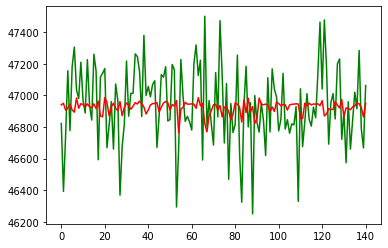

In [735]:
import matplotlib.pyplot as plt

origin = scaler.inverse_transform(y_test.reshape(y_test.shape[0],1))
predict = scaler.inverse_transform(y_predict)

plt.plot(origin, color='g')
plt.plot(predict, color='r')


In [145]:

model = tf.keras.models.load_model("resource/model/regression_20220415.h5")
# Calling `save('my_model.h5')` creates a h5 file `my_model.h5`.
model.save("regression_20220415.h5")

# It can be used to reconstruct the model identically.
# reconstructed_model = keras.models.load_model("my_h5_model.h5")

In [ ]:
import numpy as np
def create_dataset(signal_data, look_back=1):
    x_arr, y_arr = [], []
    for i in range(len(signal_data) - look_back):
        x_arr.append(signal_data[i:(i + look_back), 0])
        y_arr.append(signal_data[i + look_back, 0])

    x_arr = np.array(x_arr)
    x_arr = np.reshape(x_arr, (x_arr.shape[0], x_arr.shape[1], 1))
    return x_arr, np.array(y_arr)

klines_dataset = pd.read_csv('resource/dataset/binance/klines-BTCUSDT-1m_20220101090000_20220101205900.csv').to_numpy()

# 훈련
train = klines_dataset[0:int(len(klines_dataset) * 0.5)]
# 검증
val = klines_dataset[int(len(klines_dataset) * 0.5):int(len(klines_dataset) * 0.75)]
# 시험
test = klines_dataset[int(len(klines_dataset) * 0.75):-1]

x_train, y_train = create_dataset(train, look_back)
x_val, y_val = create_dataset(val, look_back)
x_test, y_test = create_dataset(test, look_back)
